In [2]:
import numpy as np
import matplotlib.pyplot as plt

[[ 0.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 6.28943332e-03  9.99980221e-01  1.00000000e+00]
 [ 1.25786178e-02  9.99920886e-01  1.00000000e+00]
 ...
 [-1.25786178e-02  9.99920886e-01  1.00000000e+00]
 [-6.28943332e-03  9.99980221e-01  1.00000000e+00]
 [-2.44929360e-16  1.00000000e+00  1.00000000e+00]]


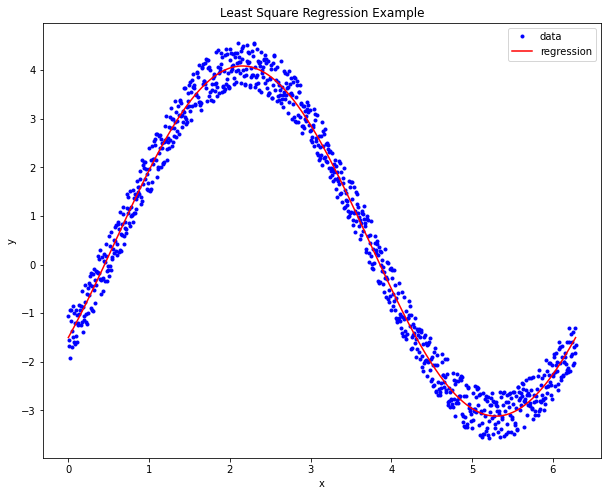

In [29]:
x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos]

def my_lin_regression(x, y, f):
    xs = []
    for i in range(len(f)):
        xs.append([f[i](j) for j in x])
    A = np.vstack([xs, np.ones(len(x))]).T

    return np.linalg.inv(A.T @ A) @ A.T @ y


beta = my_lin_regression(x, y, f)

plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.', label='data')
plt.plot(x, beta[0]*f[0](x)+beta[1]*f[1](x)+beta[2], 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression Example')
plt.legend()
plt.show()

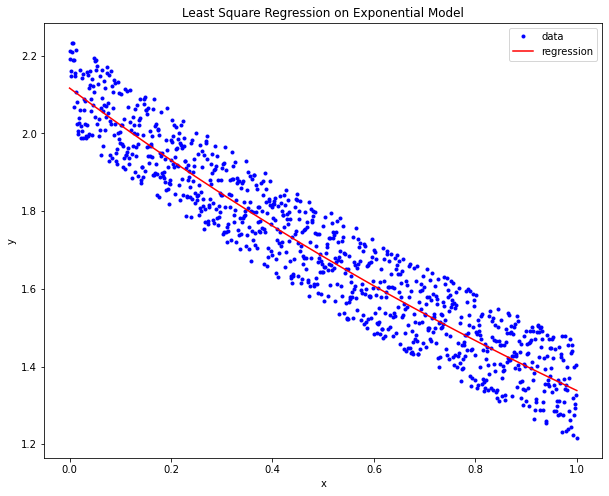

In [112]:
x = np.linspace(0, 1, 1000)
y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))

def my_exp_regression(x, y):
    A = np.vstack([np.ones(len(x)), x]).T
    
    return np.linalg.lstsq(A, np.log(y), rcond=None)[0]


log_alpha, beta = my_exp_regression(x, y)
alpha = np.exp(log_alpha)
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.', label='data')
plt.plot(x, alpha*np.exp(beta*x), 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression on Exponential Model')
plt.legend()
plt.show()
